In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv(r'..\datasets\dynamic_pricing_product_data.csv')

In [3]:
# Set style
sns.set(style="whitegrid")

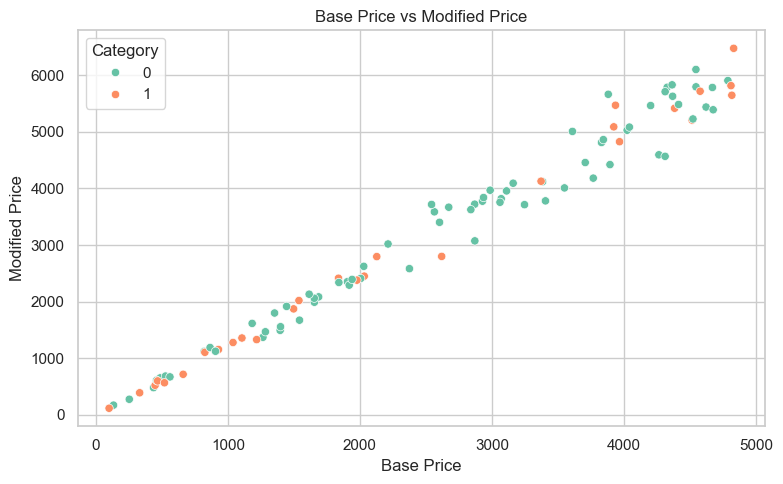

In [ ]:
# Base Price vs Modified Price
# for book category
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="BasePrice", y="ModifiedPrice", hue="Category_Books", palette="Set2")
plt.title("Base Price vs Modified Price")
plt.xlabel("Base Price")
plt.ylabel("Modified Price")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

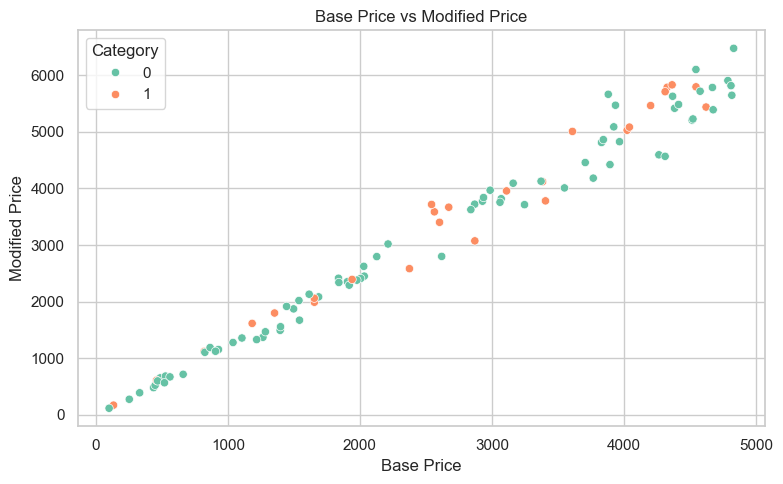

In [7]:
# Base Price vs Modified Price
# for electronics category
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="BasePrice", y="ModifiedPrice", hue="Category_Electronics", palette="Set2")
plt.title("Base Price vs Modified Price")
plt.xlabel("Base Price")
plt.ylabel("Modified Price")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

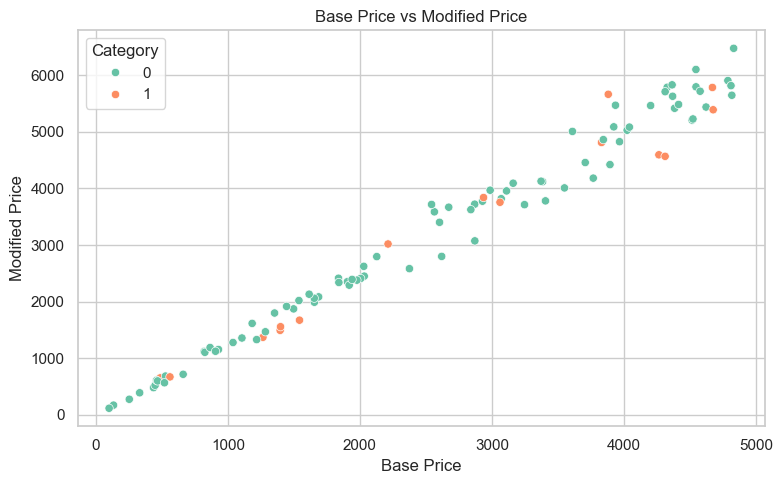

In [ ]:
# Base Price vs Modified Price
# for electronics category
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="BasePrice", y="ModifiedPrice", hue="Category_Fashion", palette="Set2")
plt.title("Base Price vs Modified Price")
plt.xlabel("Base Price")
plt.ylabel("Modified Price")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

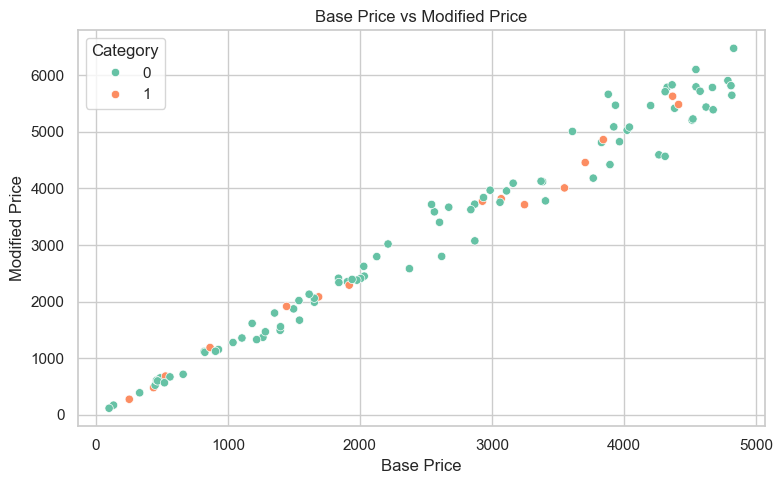

In [9]:
# Base Price vs Modified Price
# for electronics category
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="BasePrice", y="ModifiedPrice", hue="Category_Home", palette="Set2")
plt.title("Base Price vs Modified Price")
plt.xlabel("Base Price")
plt.ylabel("Modified Price")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

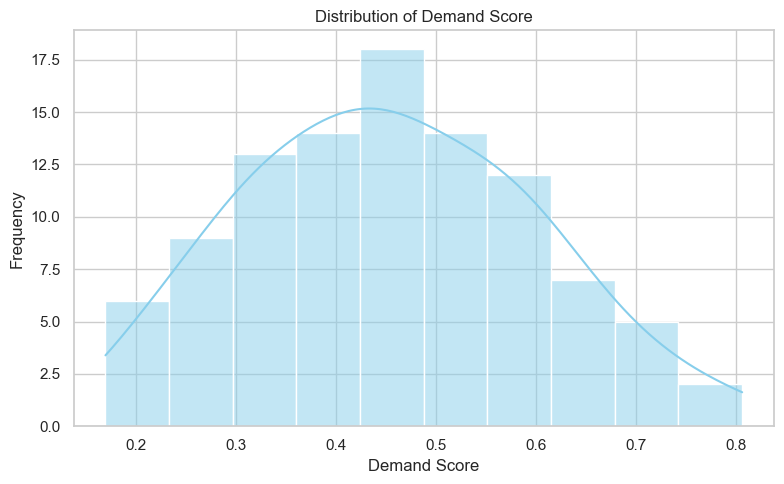

In [ ]:
# Demand Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['DemandScore'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Demand Score")
plt.xlabel("Demand Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

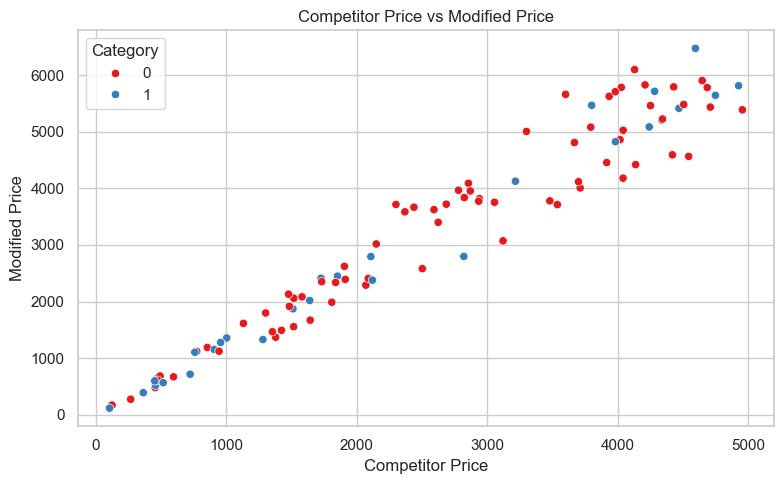

In [12]:
# Competitor Price vs Modified Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="CompetitorPrice", y="ModifiedPrice", hue="Category_Books", palette="Set1")
plt.title("Competitor Price vs Modified Price")
plt.xlabel("Competitor Price")
plt.ylabel("Modified Price")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

In [13]:
# to find R^2, MSE and residual plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [14]:
# Load the dataset
df = pd.read_csv(r'..\datasets\dynamic_pricing_product_data.csv')

In [16]:
# Encode categorical variables (like 'Category')
df_encoded = pd.get_dummies(df, columns=["Category_Books"], drop_first=True)

In [18]:
# Features (X) and Target (y)
X = df_encoded.drop(columns=["ModifiedPrice", "ProductName"])
y = df_encoded["ModifiedPrice"]

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
# Predictions
y_pred = model.predict(X_test)

In [28]:
# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Linear Regression:");
print("\nR² Score:", r2)
print("Mean Squared Error:", mse)

Linear Regression:

R² Score: 0.9954621976684161
Mean Squared Error: 15686.811086720376


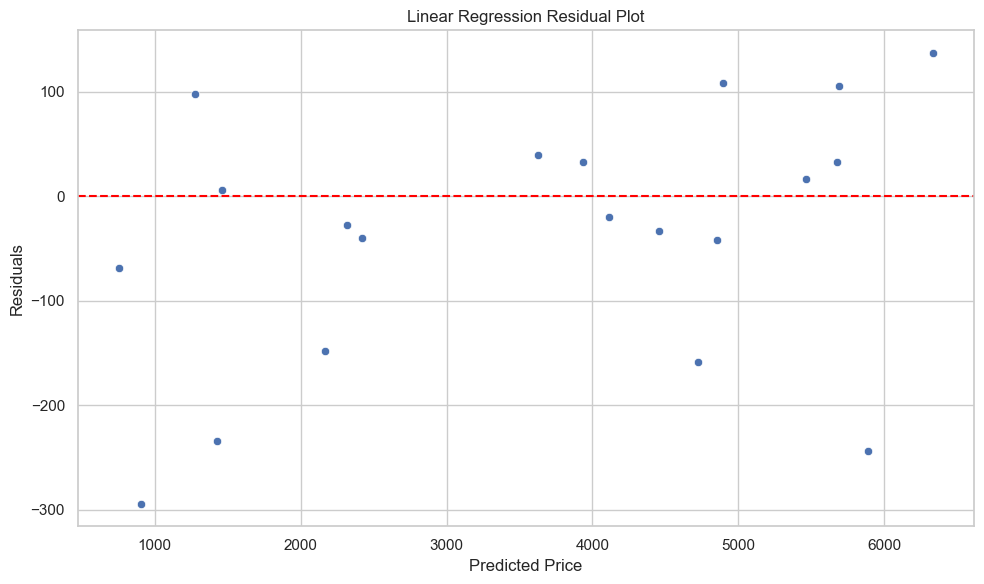

In [31]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Linear Regression Residual Plot")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

In [24]:
# for polynomial regression
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [25]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

In [27]:
print("\nPolynomial Regression (Degree 2):")
print("R² Score:", r2_score(y, y_pred_poly))
print("MSE:", mean_squared_error(y, y_pred_poly))


Polynomial Regression (Degree 2):
R² Score: 0.9999999608579443
MSE: 0.1286556233948203


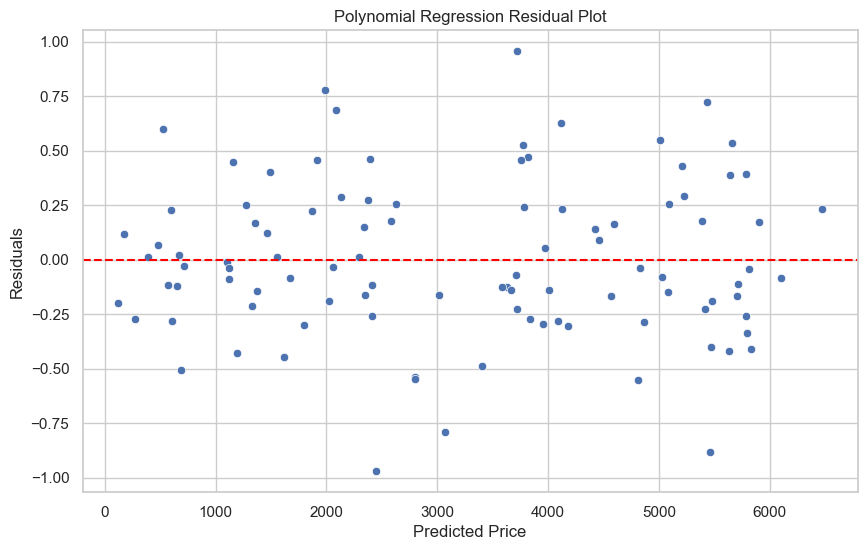

In [30]:
residuals_poly = y - y_pred_poly

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_poly, y=residuals_poly)
plt.axhline(0, linestyle='--', color='red')
plt.title("Polynomial Regression Residual Plot")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()